# Assignment 5

## Q1

In [153]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### a)

In [154]:
def computeCentroid(feat):
    return np.mean(feat, axis = 0)

### b)

In [155]:
def mykmeans(X, k):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(100):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([computeCentroid(X[labels == i]) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids


In [156]:
def compress_image(image, k):
    pixels = np.reshape(image, (-1, 3))
    centroids = mykmeans(pixels, k)
    distances = np.sqrt(((pixels[:, np.newaxis] - centroids)**2).sum(axis=2))
    compressed_pixels = centroids[np.argmin(distances, axis=1)]
    compressed_image = np.reshape(compressed_pixels, image.shape)
    return compressed_image

### c)

(512, 512, 3)
(262144, 3)


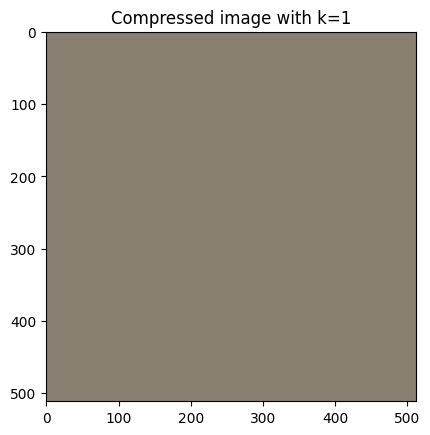

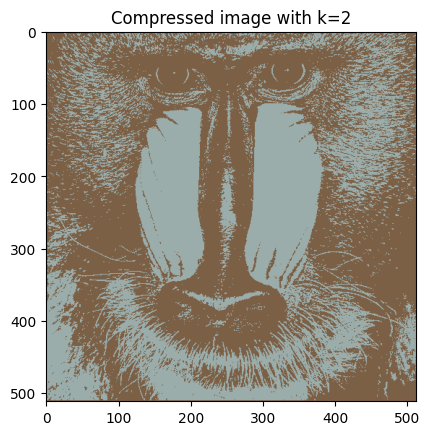

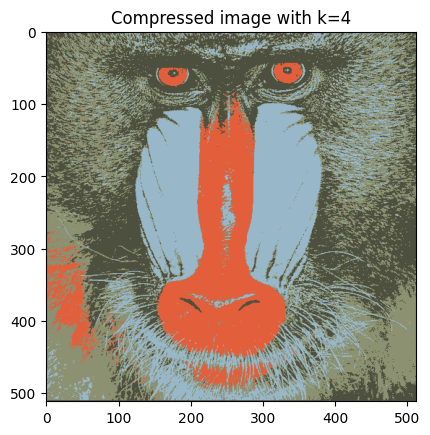

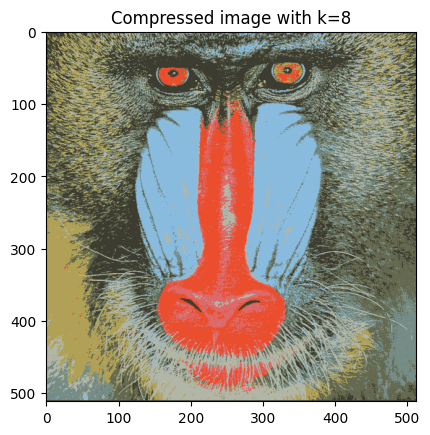

In [157]:
image_path = 'test.png'
image = Image.open(image_path)

image_np = np.array(image)

image_reshaped = image_np.reshape(-1, 3)
print(image_np.shape)
print(image_reshaped.shape)
compressed_image2 = compress_image(image_np, 3)
compressed_image2 = compressed_image2.astype(np.uint8)
for k in [1, 2, 4, 8]:
    plt.imshow(compress_image(image_np, k).astype(np.uint8))
    plt.title(f'Compressed image with k={k}')
    plt.show()

### d)

In [158]:
from sklearn.cluster import KMeans

def compress_image_sklearn(image, k):
    pixels = np.reshape(image, (-1, 3))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.reshape(compressed_pixels, image.shape)
    return compressed_image


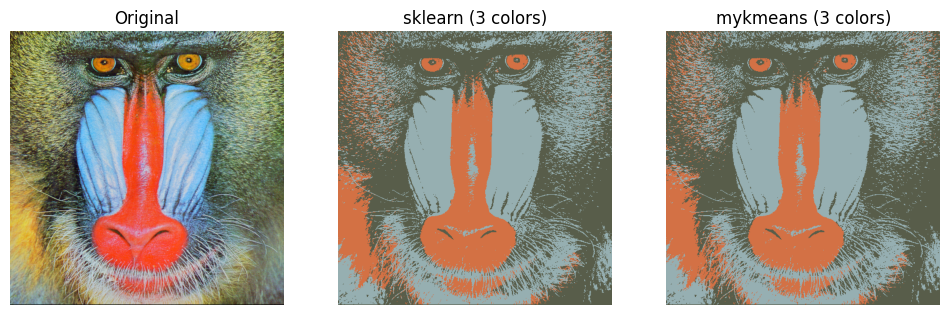

In [159]:
compressed_image1 = compress_image_sklearn(image_np, 3)

compressed_image1 = compressed_image1.astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(compressed_image1)
ax[1].set_title('sklearn ({} colors)'.format(3))
ax[1].axis('off')

ax[2].imshow(compressed_image2)
ax[2].set_title('mykmeans ({} colors)'.format(3))
ax[2].axis('off')

plt.show()

#### Difference is in execution time.
Time taken by mykmeans is more that kmeans by sklearn library

In [160]:
import time
start_time = time.time()
sklearn_lib = compress_image_sklearn(image_np, 3)
end_time = time.time()
elapsed_time3 = end_time - start_time
print("Time taken for compressing image with sklearn: {:.4f} seconds".format(elapsed_time3))

start_time = time.time()
my_sklearn = compress_image(image_np, 3)
end_time = time.time()
elapsed_time4 = end_time - start_time
print("Time taken for compressing image with mykmeans: {:.4f} seconds".format(elapsed_time4))


Time taken for compressing image with sklearn: 0.1982 seconds
Time taken for compressing image with mykmeans: 0.9247 seconds


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


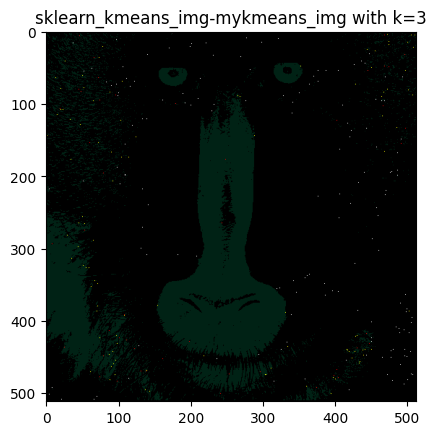

In [180]:
plt.imshow(-compressed_image2+compressed_image1)
plt.title(f'sklearn_kmeans_img-mykmeans_img with k=3')
plt.show()

### e)

In [161]:
from scipy.ndimage import gaussian_filter
def compress_blur_image(image, k):
    blurred_image = gaussian_filter(image, sigma=1)
    pixels = np.reshape(blurred_image, (-1, 3))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.reshape(compressed_pixels, blurred_image.shape)
    return compressed_image

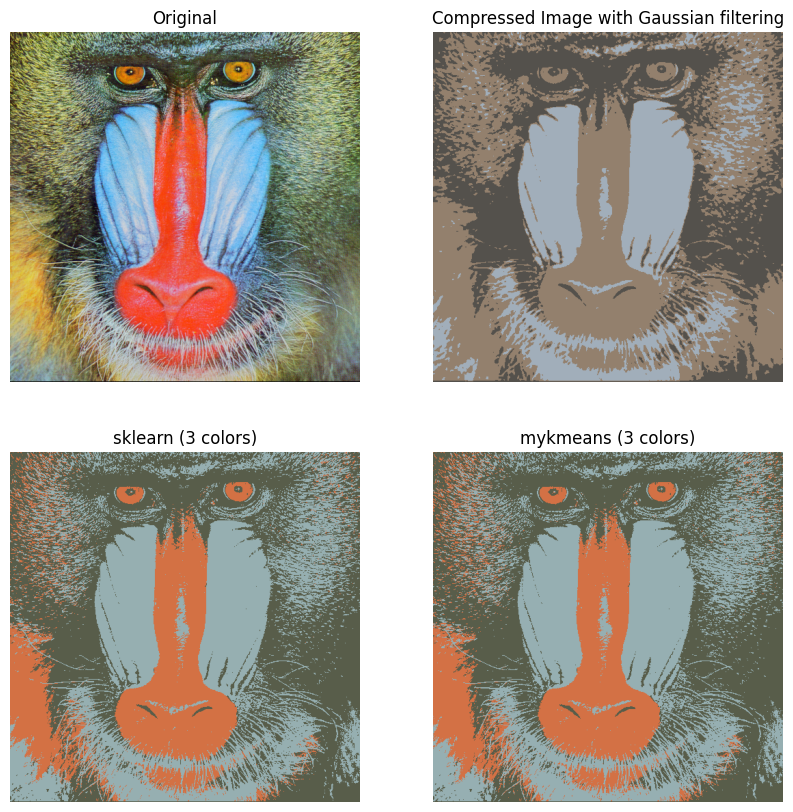

In [162]:
compressed_image = compress_blur_image(image_np, 3)

compressed_image = compressed_image.astype(np.uint8)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image)
ax[0, 0].set_title('Original')
ax[0, 0].axis('off')

ax[0, 1].imshow(compressed_image)
ax[0, 1].set_title('Compressed Image with Gaussian filtering')
ax[0, 1].axis('off')

ax[1, 0].imshow(compressed_image1)
ax[1, 0].set_title('sklearn ({} colors)'.format(3))
ax[1, 0].axis('off')

ax[1, 1].imshow(compressed_image2)
ax[1, 1].set_title('mykmeans ({} colors)'.format(3))
ax[1, 1].axis('off')

plt.show()

plt.show()


#### Comparing time

In [181]:
start_time = time.time()
compressed_image = compress_blur_image(image_np, 3)
end_time = time.time()
elapsed_time1 = end_time - start_time
print("Time taken for compressing image with Gaussian filter: {:.4f} seconds".format(elapsed_time1))

start_time = time.time()
compressed_image1 = compress_image_sklearn(image_np, 3)
end_time = time.time()
elapsed_time3 = end_time - start_time
print("Time taken for compressing image with sklearn: {:.4f} seconds".format(elapsed_time3))

start_time = time.time()
compressed_image2 = compress_image(image_np, 3)
end_time = time.time()
elapsed_time4 = end_time - start_time
print("Time taken for compressing image with mykmeans: {:.4f} seconds".format(elapsed_time4))



Time taken for compressing image with Gaussian filter: 0.2166 seconds
Time taken for compressing image with sklearn: 0.1987 seconds
Time taken for compressing image with mykmeans: 1.3004 seconds


In [182]:
print("Time taken for bluring is : {:.4f} seconds".format(elapsed_time1-elapsed_time3))

Time taken for bluring is : 0.0179 seconds


## Q2

### Task 1

#### a)

In [165]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target

X_binary = X[y != 2]
y_binary = y[y != 2]

scaler = StandardScaler()
X_binary_scaled = scaler.fit_transform(X_binary)

X_train, X_test, y_train, y_test = train_test_split(X_binary_scaled, y_binary, test_size=0.3, random_state=42)

#### b)

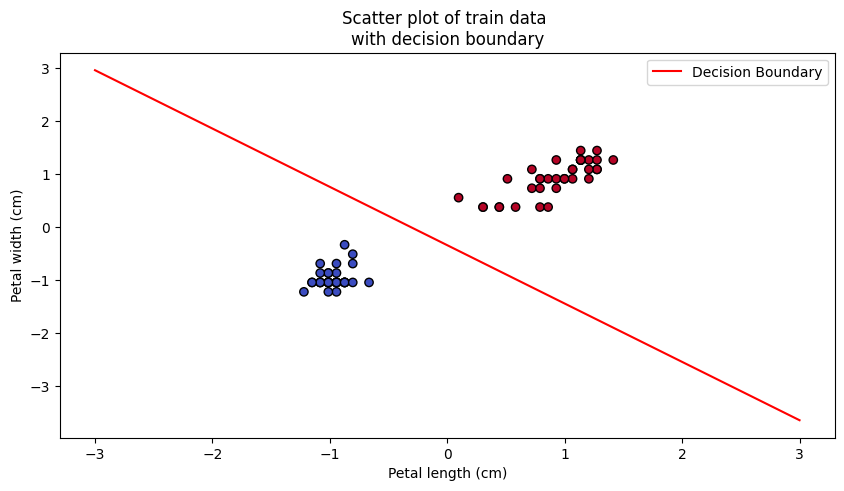

In [166]:
# Plot scatter plot
from sklearn import svm
clf = svm.SVC(kernel="linear", gamma=0).fit(X_train, y_train)
x_min, x_max = -3,3
y_min, y_max = -3,3
    
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Scatter plot of train data \nwith decision boundary')

w = clf.coef_[0]
b = clf.intercept_[0]
x_plot = np.linspace(x_min, x_max, 100)
y_plot = -(w[0] * x_plot + b) / w[1]
plt.plot(x_plot, y_plot, '-r', label='Decision Boundary')

plt.legend()
plt.show()


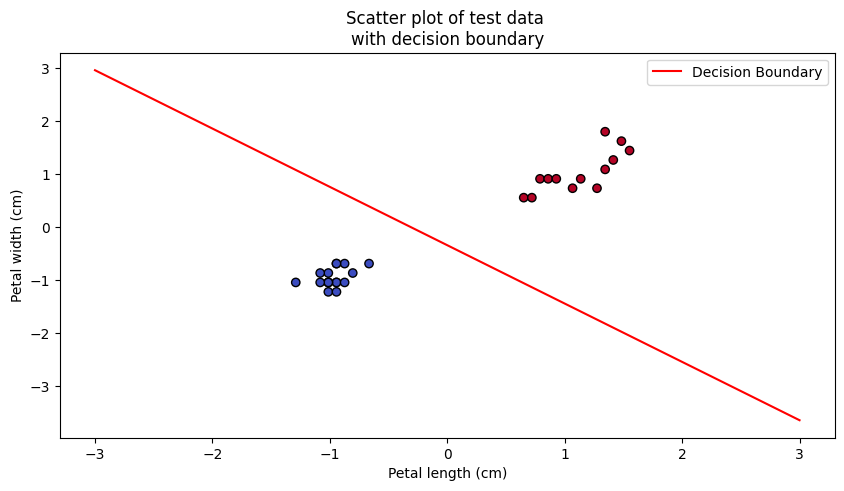

In [167]:
x_min, x_max = -3,3
y_min, y_max = -3,3
    
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Scatter plot of test data \nwith decision boundary')

w = clf.coef_[0]
b = clf.intercept_[0]
x_plot = np.linspace(x_min, x_max, 100)
y_plot = -(w[0] * x_plot + b) / w[1]
plt.plot(x_plot, y_plot, '-r', label='Decision Boundary')

plt.legend()
plt.show()

### Task 2

#### a)

In [168]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=500, noise=0.05, random_state=42)


#### b)

In [169]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(kernel, X, y):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=1).fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(10, 7))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

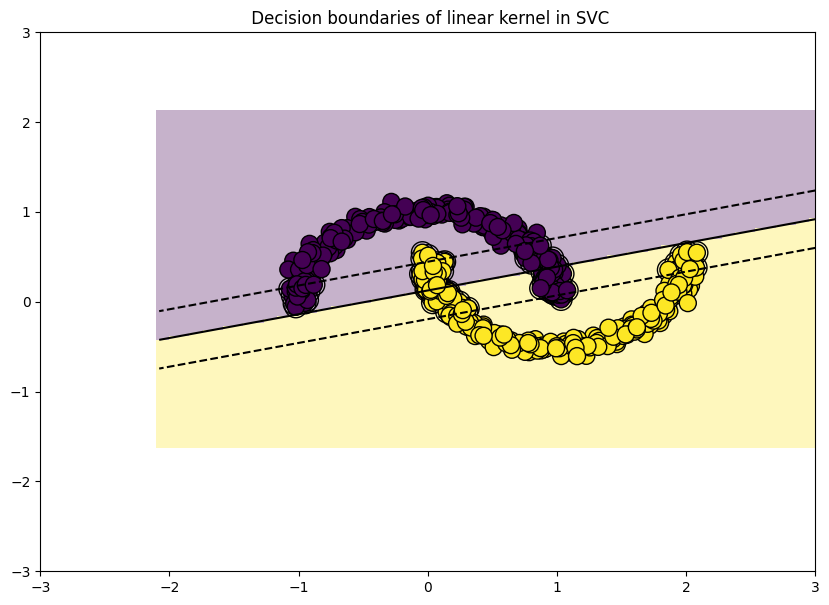

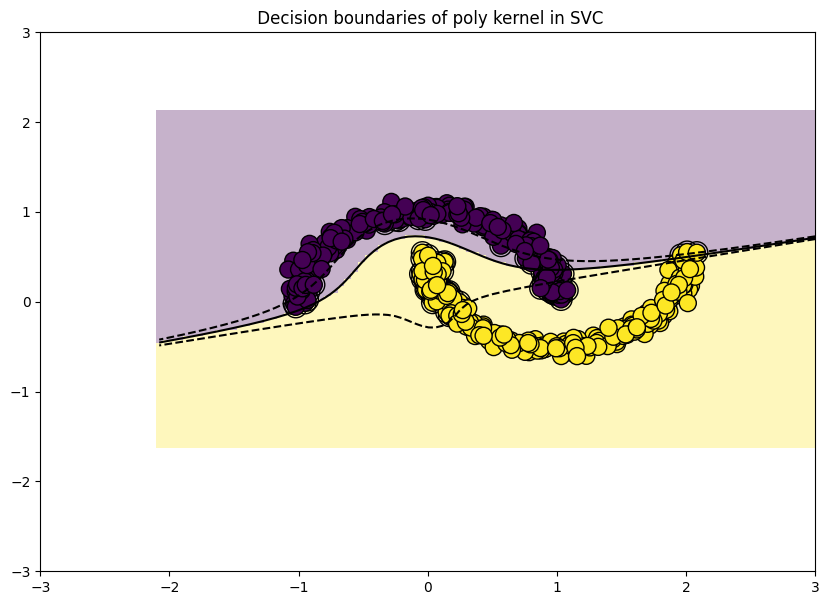

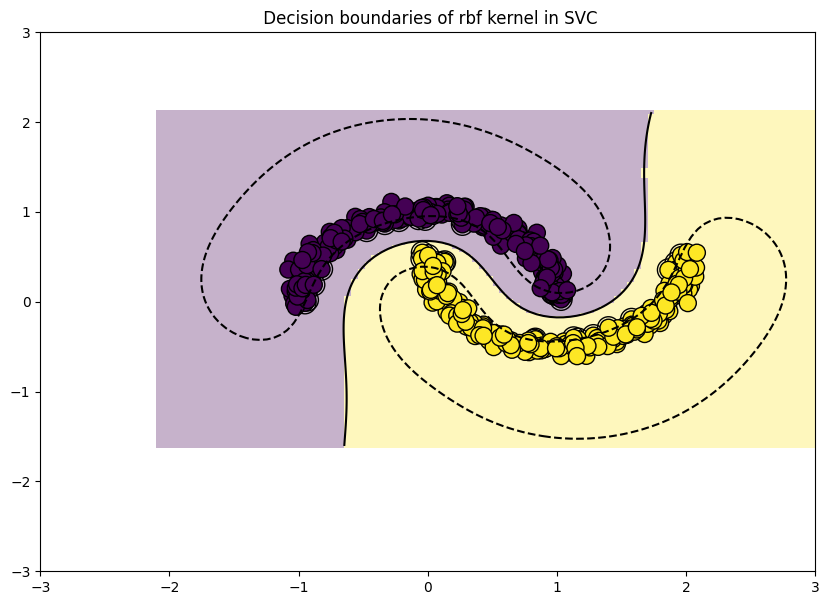

In [170]:
plot_training_data_with_decision_boundary(kernel='linear', X=X_moons, y=y_moons)
plot_training_data_with_decision_boundary(kernel='poly', X=X_moons, y=y_moons)
plot_training_data_with_decision_boundary(kernel='rbf', X=X_moons, y=y_moons)

#### c)

In [171]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

# Define parameter distributions for randomized search
param_dist = {'C': reciprocal(0.1, 100), 'gamma': reciprocal(0.001, 1)}

# Perform randomized search
random_search = RandomizedSearchCV(svm.SVC(kernel='rbf'), param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_moons, y_moons)

# Get best hyperparameters
best_params_random = random_search.best_params_
print("Best hyperparameters:", best_params_random)


Best hyperparameters: {'C': 1.3292918943162166, 'gamma': 0.711447600934342}


#### d)

In [172]:
def plot_best_boundary(kernel, X, y):
    # Train the SVC
    clf = svm.SVC(kernel=kernel,C = best_params_random['C'] , gamma=best_params_random['gamma']).fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(10, 7))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

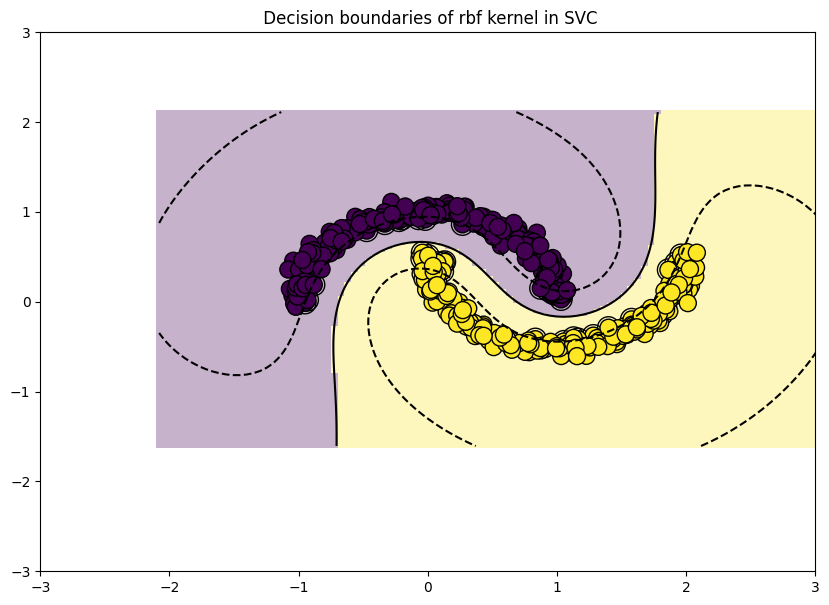

In [173]:
plot_best_boundary(kernel='rbf', X=X_moons, y=y_moons)

In [183]:
from sklearn.metrics import accuracy_score
clf1 = svm.SVC(kernel='rbf',gamma=5)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy score of gamma = 1:", accuracy)

clf2 = svm.SVC(kernel='rbf',gamma=best_params_random['gamma'], C=best_params_random['C'])
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy score of best params:", accuracy)


Accuracy score of gamma = 1: 1.0
Accuracy score of best params: 1.0
